# Testing with more points 0-20km

In [1]:
# Importing dependency
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Data path, creating the model object and the name
data_path = '../../../../input/Santos_Basin/Santos_Basin_88ma_seismic/v3.0.0/'
geo_model = gp.create_model('Santos_Basin_88ma_v3.0.0')

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
# Extension of the model, resolution of the model and the paths of surface and orientation
gp.init_data(geo_model,
             extent=[0, 4000, 0, 20000, -13000, 0],
             resolution=[50, 50, 50],
             path_i=data_path + "surfaces_points_2.csv",
             path_o=data_path + "orientations_points_2.csv")

Active grids: ['regular']


Santos_Basin_88ma  2023-05-26 13:23

In [4]:
# The surfaces of the model
gp.get_data(geo_model, 'surfaces')

,surface,series,order_surfaces,color,id
0,TOP_CAMBURI_SUP,Default series,1,#015482,1
1,BOT_CAMBURI_SUP,Default series,2,#9f0052,2
2,TOP_CAMBURI_INF,Default series,3,#ffbe00,3
3,BOT_CAMBURI_INF,Default series,4,#728f02,4
4,TOP_ARIRI,Default series,5,#443988,5
5,BOT_ARIRI,Default series,6,#ff3f20,6
6,TOP_BV_SUP,Default series,7,#5DA629,7
7,BOT_BV_SUP,Default series,8,#4878d0,8
8,TOP_BV_INF,Default series,9,#ee854a,9
9,BOT_BV_INF,Default series,10,#6acc64,10


In [ ]:
gp.map_stack_to_surfaces(geo_model,
                         {"Strat_Series_1": ('CAMBURI_SUP'),
                          "Strat_series_2": ('CAMBURI_INF'),
                          "Strat_series_3": ('ARIRI'),
                          "Strat_series_4": ('BV_SUP', 'BV_INF', 'ITAPEMA', 'CAMBORIU', 'basement')})

# Ver o grid do modelo
geo_model.grid

In [5]:
gp.map_stack_to_surfaces(geo_model,
                         {"Strat_Series_1": ('TOP_CAMBURI_SUP', 'BOT_CAMBURI_SUP'),
                          "Strat_series_2": ('TOP_CAMBURI_INF', 'BOT_CAMBURI_INF'),
                          "Strat_series_3": ('TOP_ARIRI', 'BOT_ARIRI'),
                          "Strat_series_4": ('TOP_BV_SUP', 'BOT_BV_SUP'),
                          "Strat_series_5": ('TOP_BV_INF', 'BOT_BV_INF', 'TOP_ITAPEMA', 'BOT_ITAPEMA', 'TOP_CAMBORIU', 'BOT_CAMBORIU', 'basement')})

# Ver o grid do modelo
geo_model.grid

Grid Object. Values: 
array([[    40.,    200., -12870.],
       [    40.,    200., -12610.],
       [    40.,    200., -12350.],
       ...,
       [  3960.,  19800.,   -650.],
       [  3960.,  19800.,   -390.],
       [  3960.,  19800.,   -130.]])

In [6]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,TOP_CAMBURI_SUP,Strat_Series_1,1,#015482,1
1,BOT_CAMBURI_SUP,Strat_Series_1,2,#9f0052,2
2,TOP_CAMBURI_INF,Strat_series_2,1,#ffbe00,3
3,BOT_CAMBURI_INF,Strat_series_2,2,#728f02,4
4,TOP_ARIRI,Strat_series_3,1,#443988,5
5,BOT_ARIRI,Strat_series_3,2,#ff3f20,6
6,TOP_BV_SUP,Strat_series_4,1,#5DA629,7
7,BOT_BV_SUP,Strat_series_4,2,#4878d0,8
8,TOP_BV_INF,Strat_series_5,1,#ee854a,9
9,BOT_BV_INF,Strat_series_5,2,#6acc64,10


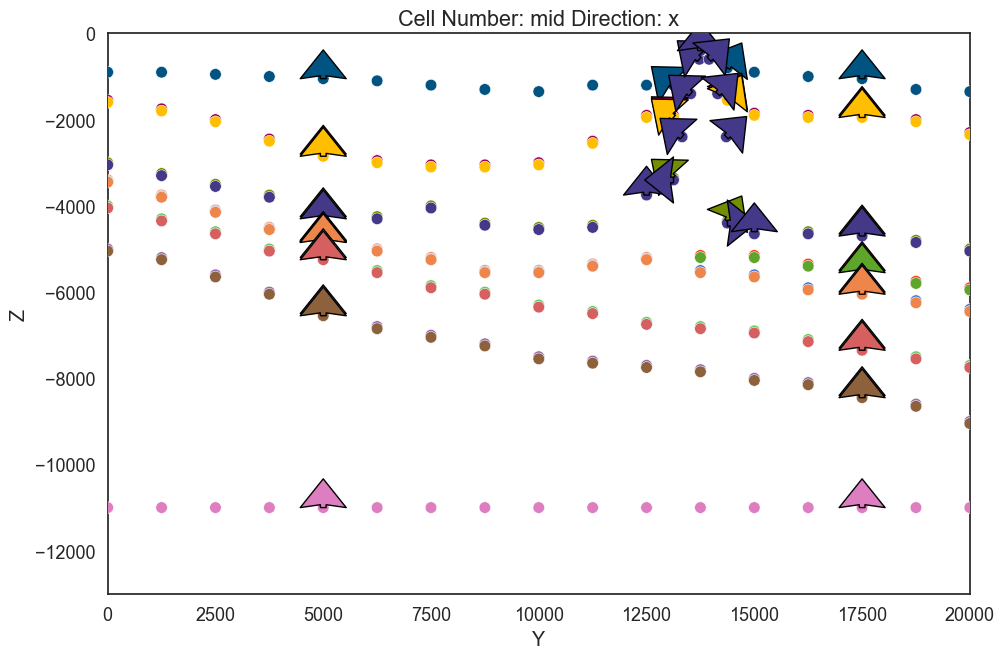

In [7]:
# Plot 2D of the data in X, Y and Z direction
gp.plot_2d(geo_model, direction=['x'], show_data=True, show_boundaries=True, legend=False, show=True)

#gp.plot_2d(geo_model, direction=['y'], show_data=True, show_boundaries=True, legend=False, show=True)

#gp.plot_2d(geo_model, direction=['z'], show_data=True)

In [8]:
# Plot in 3D
gpv = gp.plot_3d(geo_model, plotter_type='basic', image=False, show_data=True, show_surfaces=True, show_scalar=True, show_boundaries=True)

In [9]:
%%time
# Interpolating
gp.set_interpolator(geo_model,
                    theano_optimizer='fast_run',
                    compile_theano=True
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                           values
range               24186.773245
$C_o$            13928571.428571
drift equations  [3, 3, 3, 3, 3]
Wall time: 20.5 s


In [10]:
%%time
# Computing a solution for the model
sol = gp.compute_model(geo_model, compute_mesh=True)

Wall time: 13.1 s


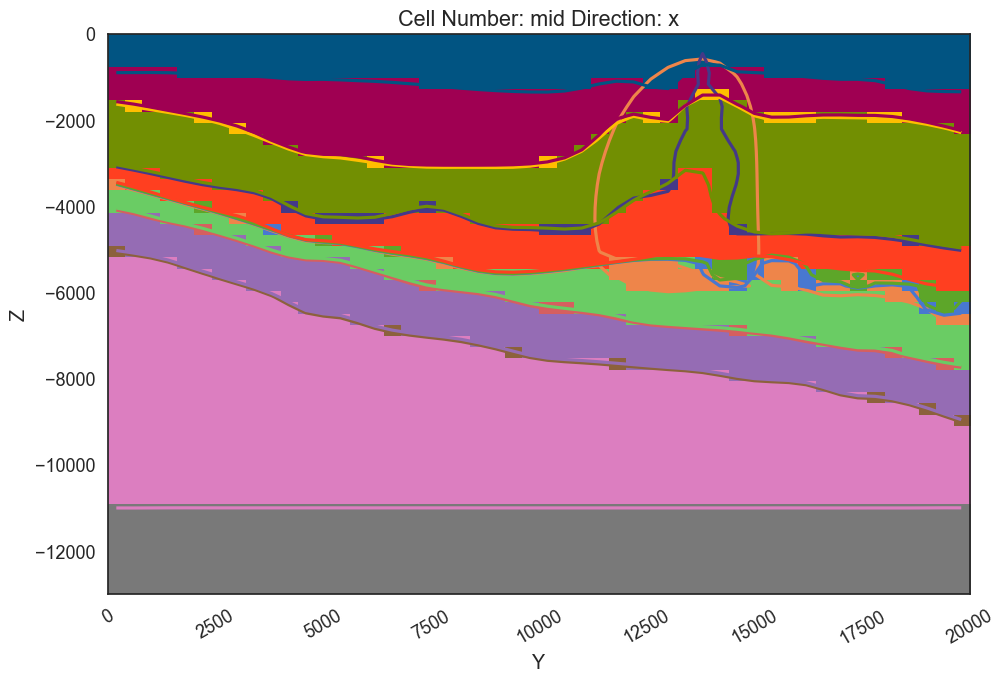

In [11]:
# Plot 2D of Y and X
#gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True, legend=False)

In [12]:
# Plot 3D
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=False, show_results=True, show_lith=True, show_boundaries=True)

In [ ]:
# Saving the model in a .zip file
'''
This code saves the model in a .zip file in 
the same folder that the .ipynb file is located
'''

#gp.save_model(geo_model, compress=True)